In [1]:
## My first python example in Machine Learning
## Tianyu
## Nov. 2016
##
## II. Checking Data
import pandas as pd

In [2]:
# Load data
iris_data=pd.read_csv('iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data=pd.read_csv('iris-data.csv',na_values=['NA'])

In [4]:
# Basic Desc
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

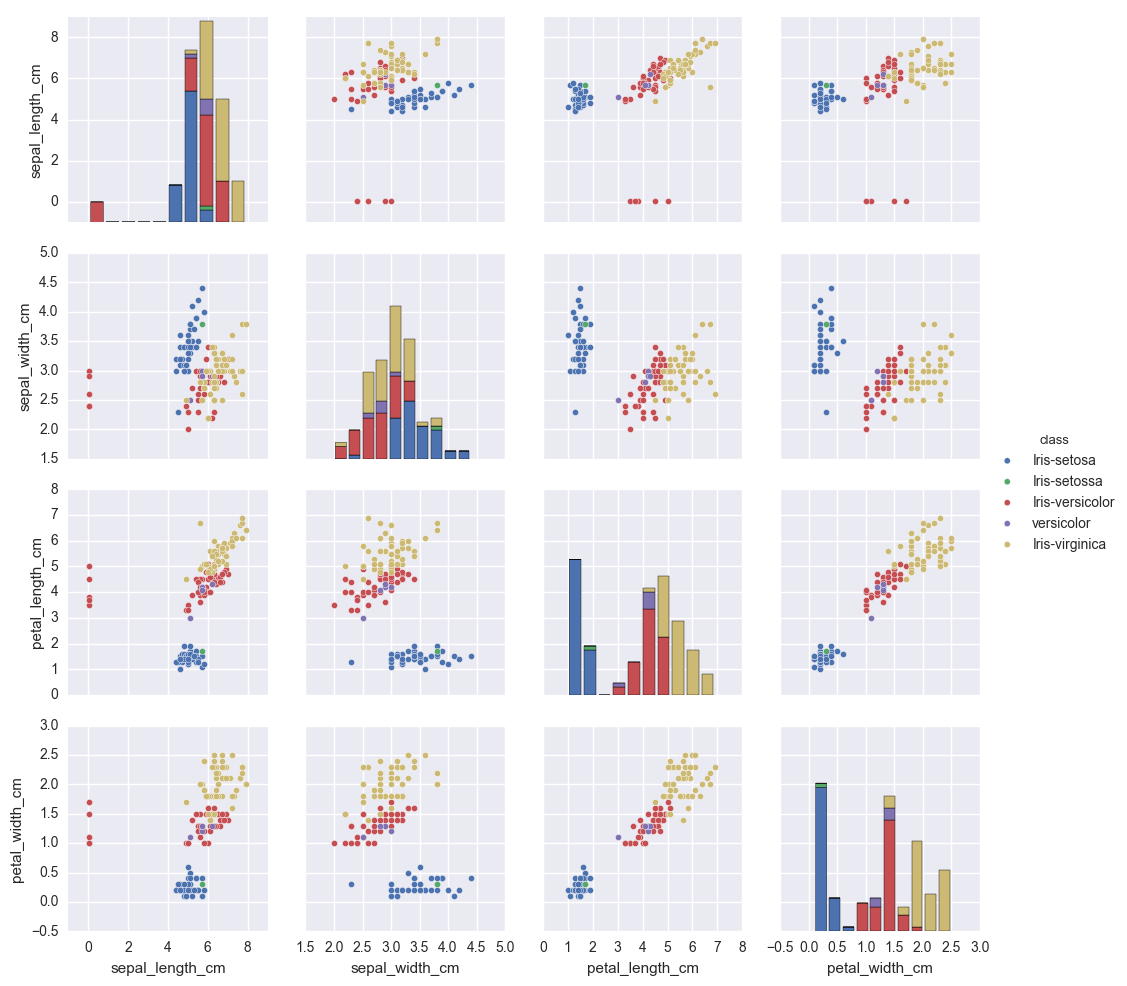

In [6]:
# Basic Pair Plot
sb.pairplot(iris_data.dropna(), hue='class')

In [7]:
# Errorneous
# 1. five classes
# 2. outliers
# 3. missing values

In [8]:
### III. Tidying the data
# Clean Up
iris_data.loc[iris_data['class']=='versicolor','class']='Iris-versicolor'
iris_data.loc[iris_data['class']=='Iris-setossa','class']='Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

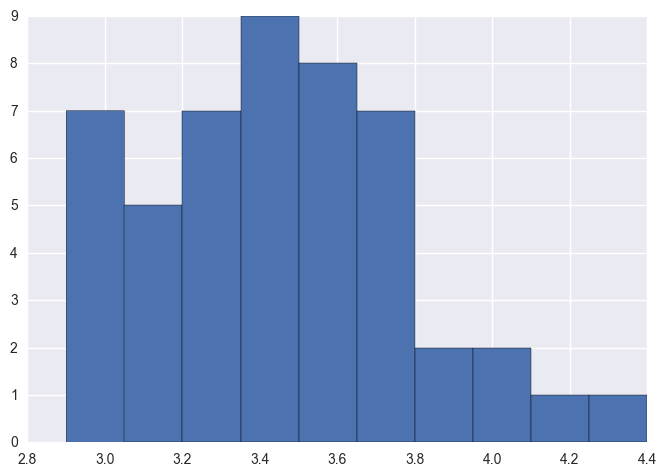

In [9]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
# | means 并集
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [10]:
iris_data.loc[(iris_data['class']=="Iris-versicolor")&(iris_data['sepal_length_cm']<1.0)]
# sepal_length_cm have been recorded in meters instead of centimeters

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


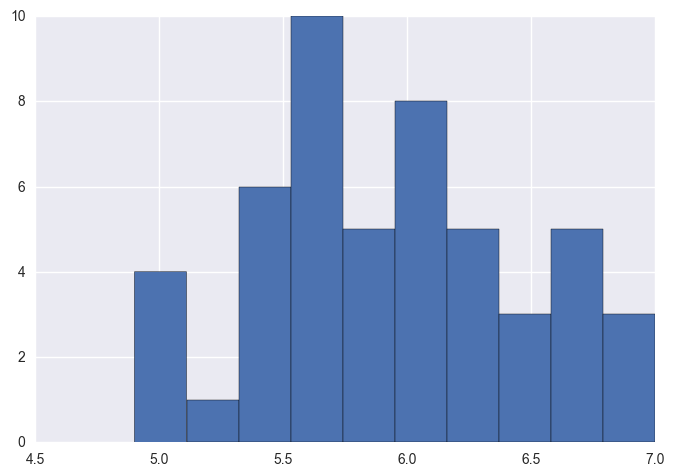

In [11]:
iris_data.loc[(iris_data['class']=='Iris-versicolor')&(iris_data['sepal_length_cm']<1.0),'sepal_length_cm']*=100.0
iris_data.loc[iris_data['class']=='Iris-versicolor','sepal_length_cm'].hist()

In [12]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) | 
            (iris_data['sepal_width_cm'].isnull())|
            (iris_data['petal_length_cm'].isnull()) | 
            (iris_data['petal_width_cm'].isnull())]
                 

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


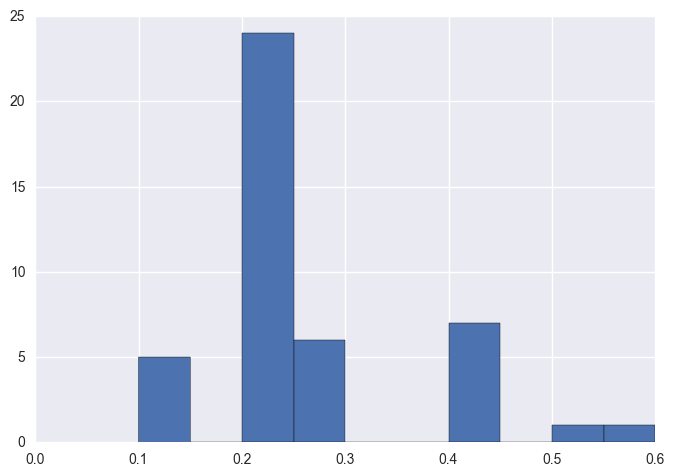

In [13]:
# Find NAN in a specific class, use hist to confirm our assumption
iris_data.loc[iris_data['class']=='Iris-setosa','petal_width_cm'].hist()

In [14]:
# Use Mean Imputation to deal with systematic NAN
# Otherwise, drop nan value using dropna() call
# iris_data.dropna(inplace=True)
# calculate average value
average_petal_width=iris_data.loc[iris_data['class']=='Iris-setosa', 'petal_width_cm'].mean()

# assign average value to nan
iris_data.loc[(iris_data['class']=='Iris-setosa') & 
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm']=average_petal_width

# check the new value
iris_data.loc[(iris_data['class']=='Iris-setosa') &
             (iris_data['petal_width_cm']==average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [15]:
# Double check on NAN
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) | 
            (iris_data['sepal_width_cm'].isnull())|
            (iris_data['petal_length_cm'].isnull()) | 
            (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [16]:
# Save tided data as a separate file
iris_data.to_csv('iris-data-clean.csv',index=False)
iris_data_clean=pd.read_csv('iris-data-clean.csv')

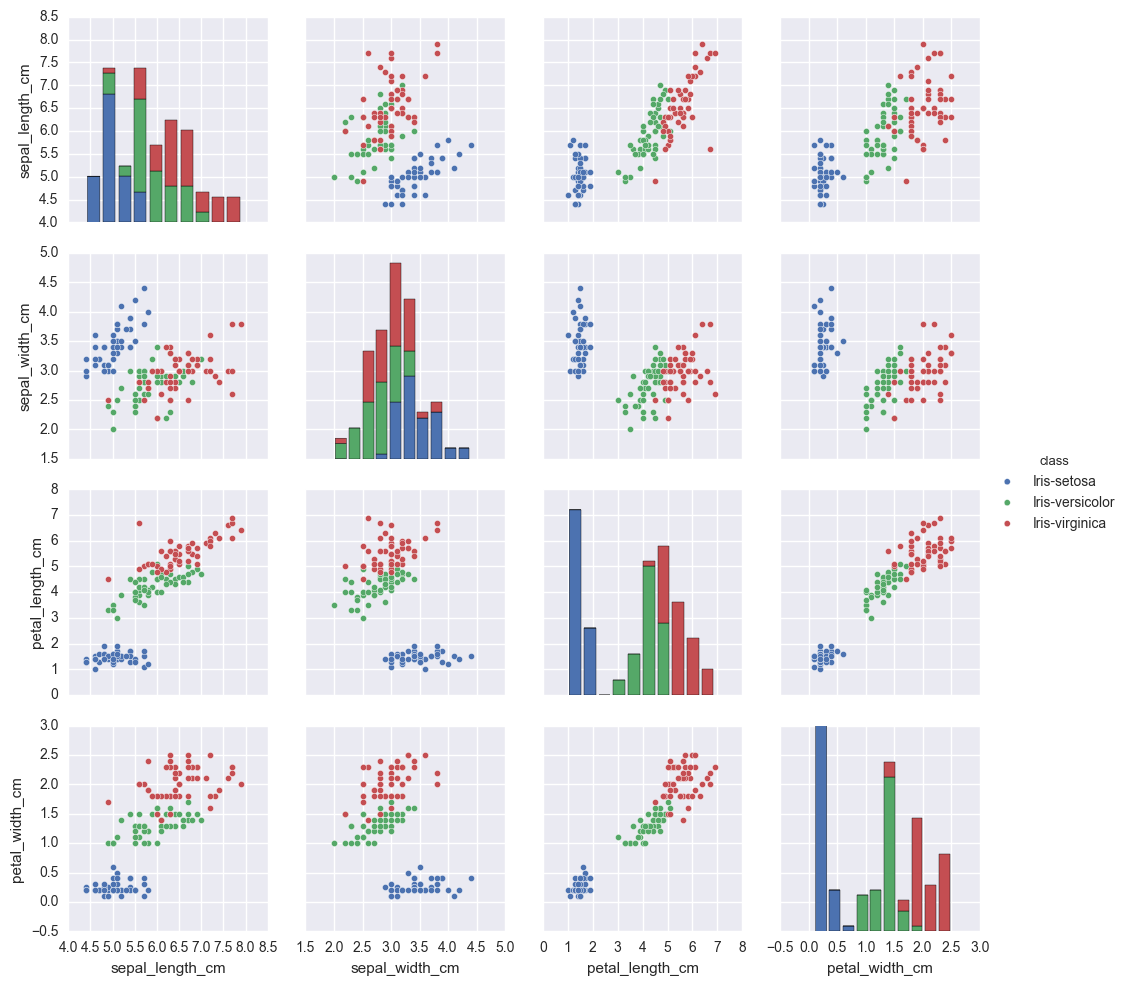

In [17]:
# re-pairplot
sb.pairplot(iris_data_clean, hue='class')

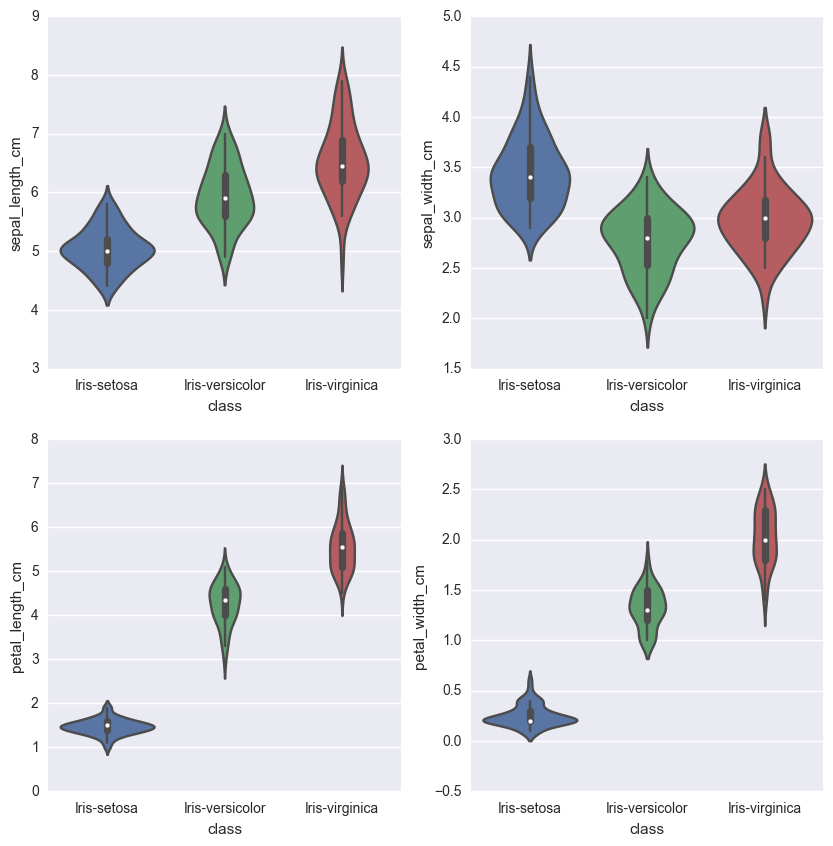

In [18]:
### IV. Exploratory Analysis
# Distribution, Correlations and Factors explain correlations
#
# 1. Distribution
#    Normal Distributed
#
# 2. Correlations
#    petal_length vs petal_width
#    sepal_length vs sepal_width
#
# Violin Plots
plt.figure(figsize=(10,10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)


In [19]:
## V. Classification
# Input Data
iris_data_clean=pd.read_csv('iris-data-clean.csv')

# scikit-learn expects input as a list of lists
# inputs are arguments values
# classes are label

all_inputs=iris_data_clean[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values
all_classes=iris_data_clean['class'].values

# Spliting Data into Training Data and Testing Data
from sklearn.cross_validation import train_test_split
(training_inputs, testing_inputs, 
 training_classes, testing_classes)=train_test_split(all_inputs,all_classes,train_size=0.75,random_state=1)


/Users/tianyuelite/Anaconda/anaconda/envs/Iris-Example/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# Classification Model
# Decision Tree is scale-invariant
# Basic D.T.
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier=DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs,training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs,testing_classes)

0.97368421052631582

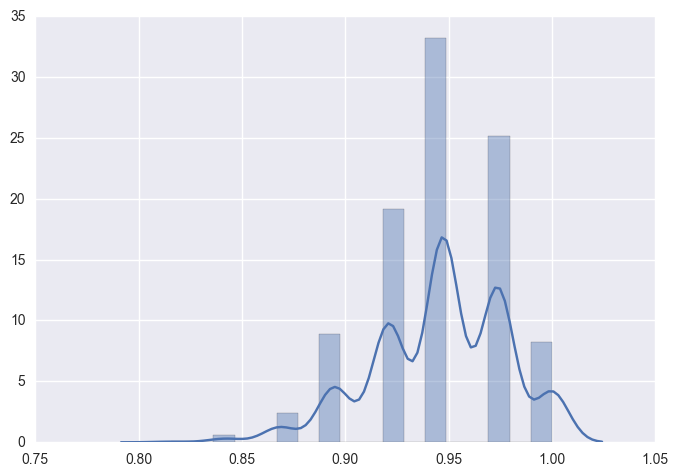

In [21]:
# Testing subset of data
model_accuracies=[]

for repetition in range(1000):
    
    # data split as list
    (training_inputs, testing_inputs, 
     training_classes, testing_classes) = train_test_split(all_inputs,all_classes,train_size=0.75)
    
    # Create the classifier
    decision_tree_classifier=DecisionTreeClassifier()
    
    # Train and fit
    decision_tree_classifier.fit(training_inputs,training_classes)
    
    # Calculate the accuracy
    classifier_accuracy=decision_tree_classifier.score(testing_inputs,testing_classes)
    
    # 
    model_accuracies.append(classifier_accuracy)

# Plot Distribution
sb.distplot(model_accuracies)

In [22]:
# Our model performs quite differently depending on the subset of the data it's trained on. 
# This phenomenon is known as Overfitting.

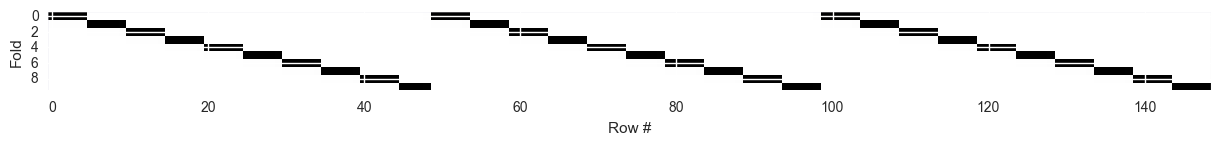

In [23]:
# Cross-validation
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks=[]
    for train, test in cv:
        mask=np.zeros(n_samples, dtype=bool)
        mask[test]=1
        masks.append(mask)
        
    plt.figure(figsize=(15,15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')
    
plot_cv(StratifiedKFold(all_classes,n_folds=10),len(all_classes))

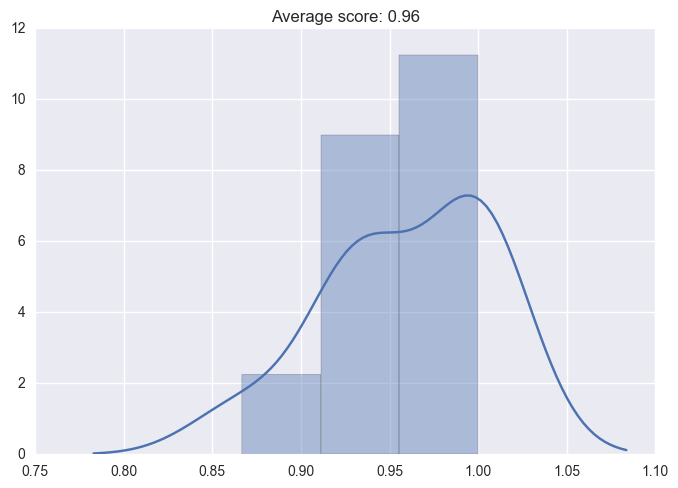

In [24]:
# Apply 10-fold cross-validation on Decision Tree
# Maintain a representative subset.

from sklearn.cross_validation import cross_val_score

cv_scores=cross_val_score(decision_tree_classifier, all_inputs,all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [25]:
# Parameter tuning
# Test what happened when we limit the depth of decision tree classifier

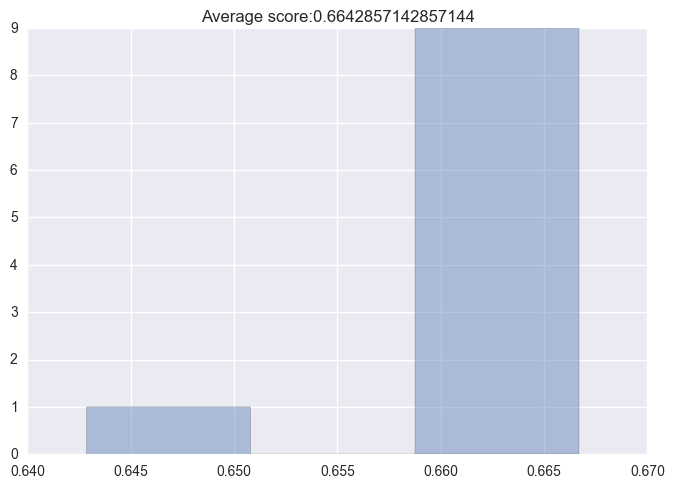

In [26]:
# set max depth = 1
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores=cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores, kde=False)
plt.title('Average score:{}'.format(np.mean(cv_scores)))

In [27]:
## Grid Search
# Explore a range of parameters and find the best-performing parameter combination.
# Repeat several times

In [28]:
# Fix two parameters for now
from sklearn.grid_search import GridSearchCV

# set classifier
decision_tree_classifier=DecisionTreeClassifier()

# set possible paraeter values
parameter_grid = {'max_depth': [1,2,3,4,5],
                  'max_features':[1,2,3,4]}

# set cross alidation
cross_validation=StratifiedKFold(all_classes,n_folds=10)
grid_search=GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)

grid_search.fit(all_inputs,all_classes)
print('Best score:{}'.format(grid_search.best_score_))
print("Best parameters:{}".format(grid_search.best_params_))

/Users/tianyuelite/Anaconda/anaconda/envs/Iris-Example/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score:0.9664429530201343
Best parameters:{'max_depth': 2, 'max_features': 3}


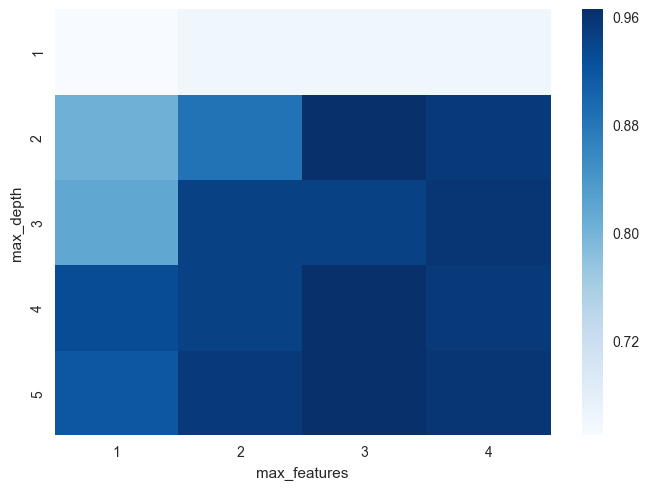

In [29]:
# Visulaize grid search about how the parameters interact
grid_visulization=[]

for grid_pair in grid_search.grid_scores_:
    grid_visulization.append(grid_pair.mean_validation_score)

grid_visulization=np.array(grid_visulization)

# parameter matrix dimension
grid_visulization.shape=(5,4)
sb.heatmap(grid_visulization, cmap='Blues')
plt.xticks(np.arange(4)+0.5,grid_search.param_grid['max_features'])
plt.yticks(np.arange(5)+0.5,grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')



In [30]:
# Apply a broad grid search
decision_tree_classifier=DecisionTreeClassifier()
parameter_grid={'criterion':['gini','entropy'],
               'splitter':['best','random'],
               'max_depth':[1,2,3,4,5],
               'max_features':[1,2,3,4]}

cross_validation=StratifiedKFold(all_classes,n_folds=10)
grid_search=GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=cross_validation)

grid_search.fit(all_inputs,all_classes)
print('Best score:{}'.format(grid_search.best_score_))
print('Best parameters:{}'.format(grid_search.best_params_))

Best score:0.959731543624161
Best parameters:{'splitter': 'best', 'max_depth': 3, 'criterion': 'gini', 'max_features': 4}


In [31]:
# use best estimator in our decision tree model
decision_tree_classifier=grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
# Visualize decision tree
import sklearn.tree as tree
from sklearn.externals.six import StringIO

# Output as iris_dtc.dot file
with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

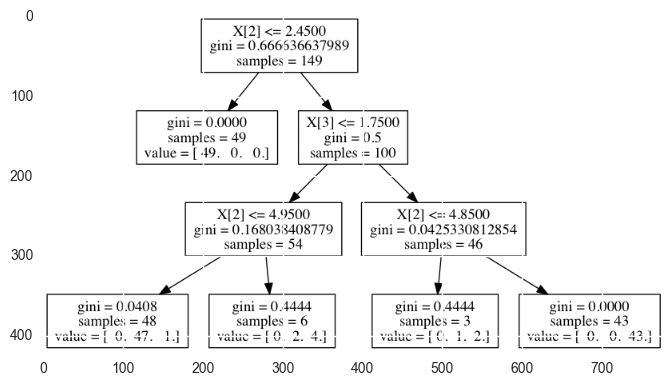

In [33]:
# Display the output decision tree
# only display png here
# need to figure out how to convert dot to png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('iris_dtc.png')
plt.imshow(img)

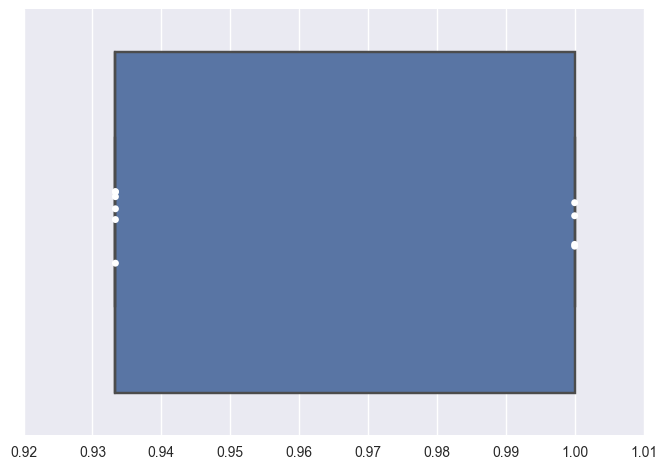

In [34]:
# RF Scores
rf_scores=cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)

# Draw boxplot for RF
sb.boxplot(rf_scores)
sb.stripplot(rf_scores,jitter=True,color='White')


In [38]:
# Test Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
parameter_grid={'n_estimators':[5,10,25,50],
               'criterion':['gini','entropy'],
               'max_features':[1,2,3,4],
               'warm_start':[True, False]}

cross_validation=StratifiedKFold(all_classes,n_folds=10)
grid_search=GridSearchCV(random_forest_classifier, parameter_grid, cv=cross_validation)
grid_search.fit(all_inputs,all_classes)

print('Best score:{}'.format(grid_search.best_score_))
print('Best parameters:{}',format(grid_search.best_params_))

grid_search.best_estimator_


Best score:0.9664429530201343
Best parameters:{} {'n_estimators': 25, 'warm_start': True, 'criterion': 'gini', 'max_features': 2}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)

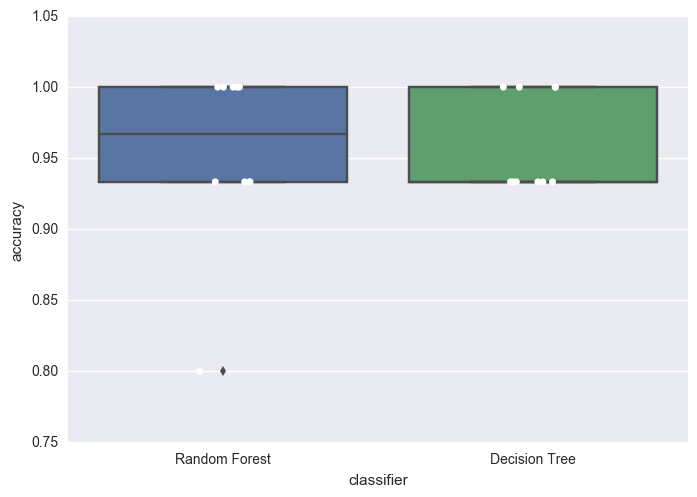

In [39]:
random_forest_classifier=grid_search.best_estimator_

rf_df=pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier,all_inputs,all_classes,cv=10),
                    'classifier':['Random Forest']*10})
dt_df=pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10),
                    'classifier':['Decision Tree']*10})
both_df=rf_df.append(dt_df)

sb.boxplot(x='classifier',y='accuracy',data=both_df)
sb.stripplot(x='classifier',y='accuracy',data=both_df,jitter=True,color='white')

In [ ]:
# No big difference
# Probably because the limitations of our data set.
# Random Forest classifier excel when there is hundreds of possible features to look at.

In [2]:
## V. Reproducibility
# Using notebook is awesome!
# Output software and hardware in our analysis
# remember to install and import watermark lib.

In [1]:
%load_ext watermark

In [5]:
%watermark -a 'Tianyu' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Tianyu Thu Nov 03 2016 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.2
pandas 0.19.0
sklearn 0.18
matplotlib 1.5.3
seaborn 0.7.1

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.1.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


/Users/tianyuelite/Anaconda/anaconda/envs/Iris-Example/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 5.   3.5  1.3  0.3]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 6.5  3.   5.8  2.2]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 5.8  2.8  5.1  2.4]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 5.7  3.   1.1  0.1]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.8  4.   1.2  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 6.8  3.   5.5  2.1]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 4.9  3.1  1.5  0.1]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.7  2.8  4.1  1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 7.9  3.8  6.4  2. ]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 6.4  3.2  4.5  1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)


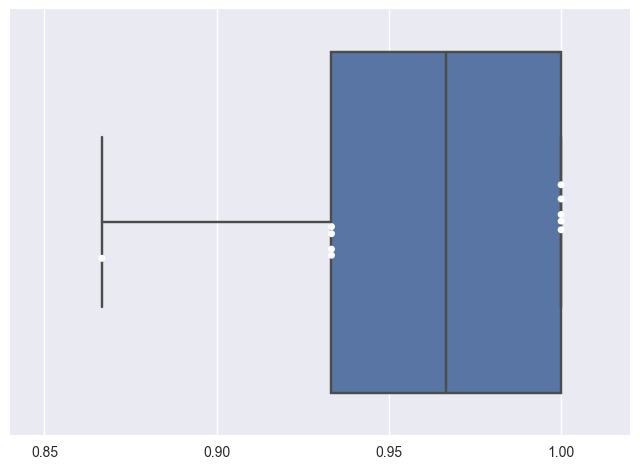

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

##Further reading

[[ go back to the top ]](#Table-of-contents)

This notebook covers a broad variety of topics but skips over many of the specifics. If you're looking to dive deeper into a particular topic, here's some recommended reading.

**Data Science**: William Chen compiled a [list of free books](http://www.wzchen.com/data-science-books/) for newcomers to Data Science, ranging from the basics of R & Python to Machine Learning to interviews and advice from prominent data scientists.

**Machine Learning**: /r/MachineLearning has a useful [Wiki page](https://www.reddit.com/r/MachineLearning/wiki/index) containing links to online courses, books, data sets, etc. for Machine Learning. There's also a [curated list](https://github.com/josephmisiti/awesome-machine-learning) of Machine Learning frameworks, libraries, and software sorted by language.

**Unit testing**: Dive Into Python 3 has a [great walkthrough](http://www.diveintopython3.net/unit-testing.html) of unit testing in Python, how it works, and how it should be used

**pandas** has [several tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) covering its myriad features.

**scikit-learn** has a [bunch of tutorials](http://scikit-learn.org/stable/tutorial/index.html) for those looking to learn Machine Learning in Python. Andreas Mueller's [scikit-learn workshop materials](https://github.com/amueller/scipy_2015_sklearn_tutorial) are top-notch and freely available.

**matplotlib** has many [books, videos, and tutorials](http://matplotlib.org/resources/index.html) to teach plotting in Python.

**seaborn** has a [basic tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) covering most of the statistical plotting features.